In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df = pd.read_csv(r'C:\data_science_academy\projeto\dataset\dataset.csv')

In [230]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [231]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [232]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [233]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [234]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

QUAL CIDADE COM MAIOR VALOR DE VENDA DE PRODUTOS DA CATEGORIA 'OFFICE SUPPLIES'?

In [235]:
office = df[df['Categoria'] == 'Office Supplies']
office.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [236]:
maior_valor = office.groupby('Cidade')['Valor_Venda'].sum()
maior_valor

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          1107.646
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Valor_Venda, Length: 480, dtype: float64

In [237]:
cidade = maior_valor.idxmax()
print(cidade)

New York City


In [238]:
maior_valor.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

QUAL O TOTAL DE VENDAS POR DATA DO PEDIDO? DEMONSTRE O RESULTADO ATRAVÉS DE UM GRÁFICO DE BARRAS.

In [239]:
# quantidade_datas = df['Data_Pedido'].value_counts()
# lista_data = list(quantidade_datas.index)
# lista_quantidade = list(quantidade_datas.values)
# print(lista_data[0], lista_quantidade[0])

In [240]:
df_data = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [241]:
df_data.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

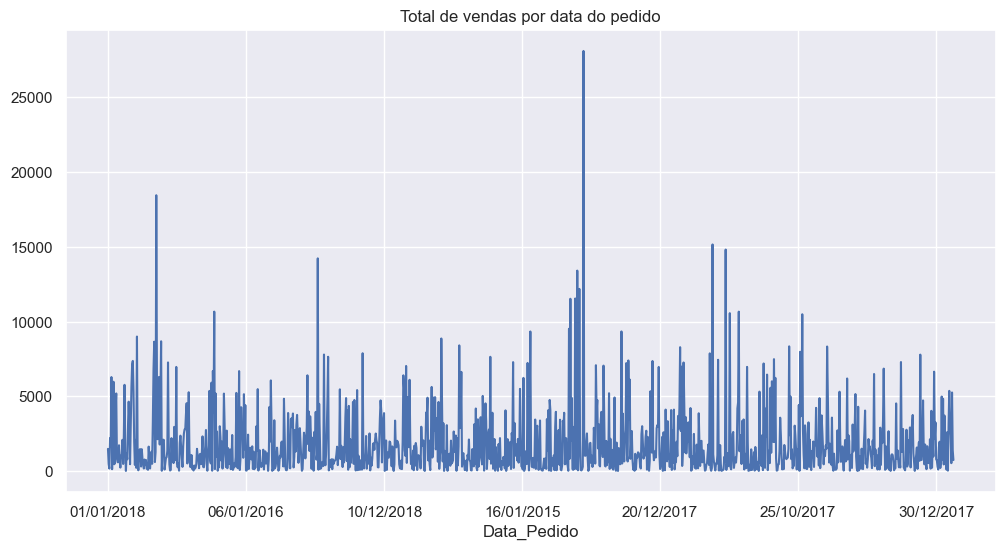

In [242]:
plt.figure(figsize=(12, 6))
df_data.plot(x = 'Data_Pedido', y = 'Valor_Venda', color='b')
plt.title('Total de vendas por data do pedido')
plt.show()

QUAL O TOTAL DE VENDAS POR ESTADO?
DEMONSTRE O RESULTADO ATRAVÉS DE UM GRÁFICO DE BARRAS.

In [243]:
# estados = df['Estado'].value_counts()
# lista_estado = list(estados.index)
# lista_quantidade = list(estados.values)
# print(lista_estado[0], lista_quantidade[0])

In [244]:
df_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

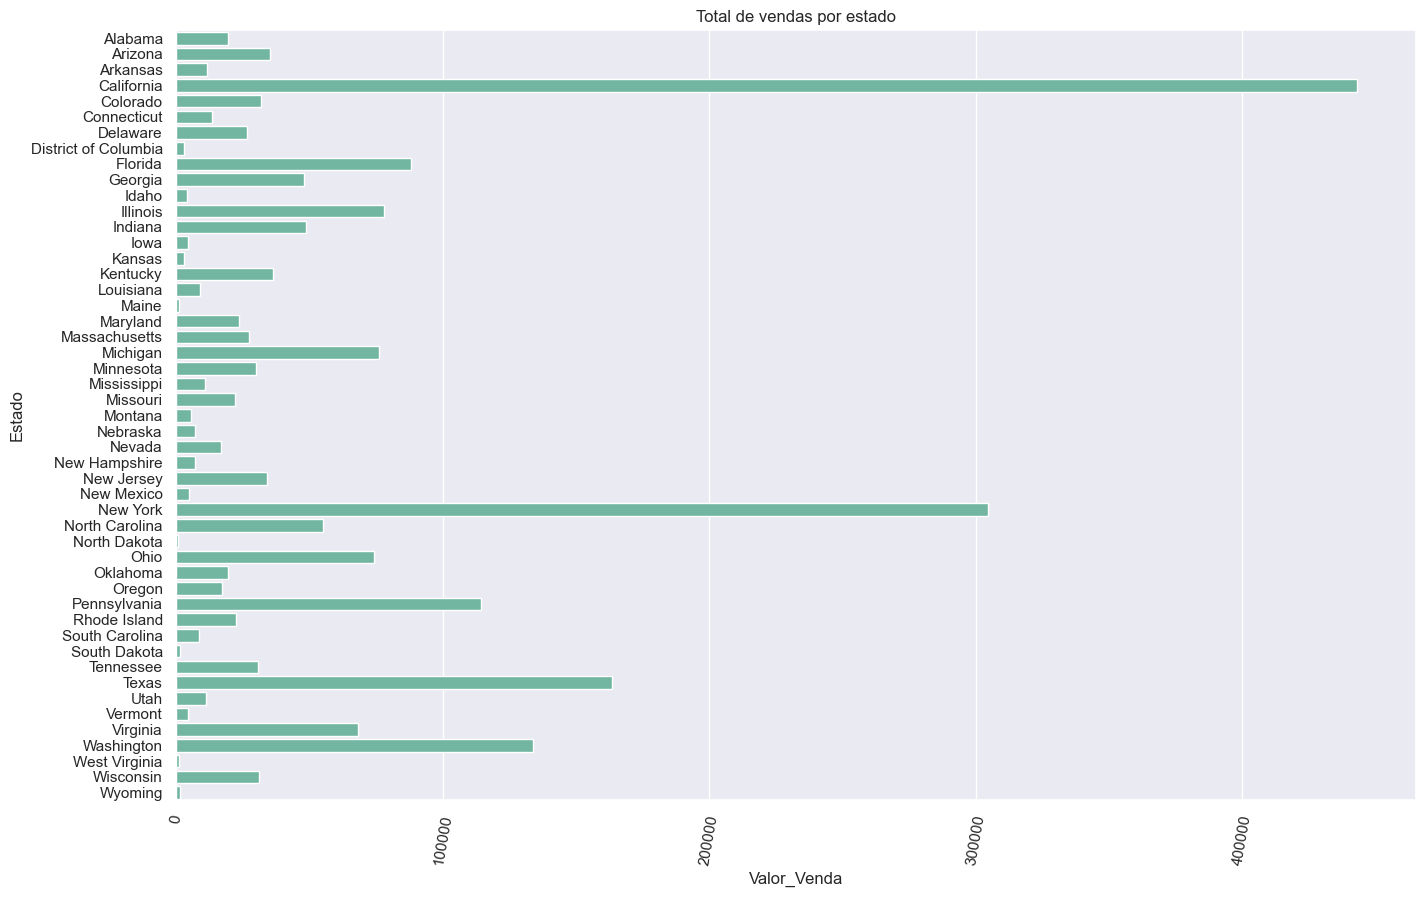

In [245]:
plt.figure(figsize=(16, 10))
sns.barplot(data = df_estado, x = 'Valor_Venda', y = 'Estado')
plt.title('Total de vendas por estado')
plt.xticks(rotation = 80)
plt.show()

QUAIS SÃO AS 10 CIDADES COM MAIOR TOTAL DE VENDAS?
DEMONSTRE O RESULTADO ATRAVÉS DE UM GRÁFICO DE BARRAS.

In [246]:
cidades = df['Cidade'].value_counts()
lista_cidades = list(cidades.index)
lista_quantidade = list(cidades.values)
print(lista_cidades[:10], lista_quantidade[:10])


['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco', 'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Springfield'] [np.int64(888), np.int64(716), np.int64(524), np.int64(496), np.int64(420), np.int64(364), np.int64(303), np.int64(218), np.int64(169), np.int64(161)]


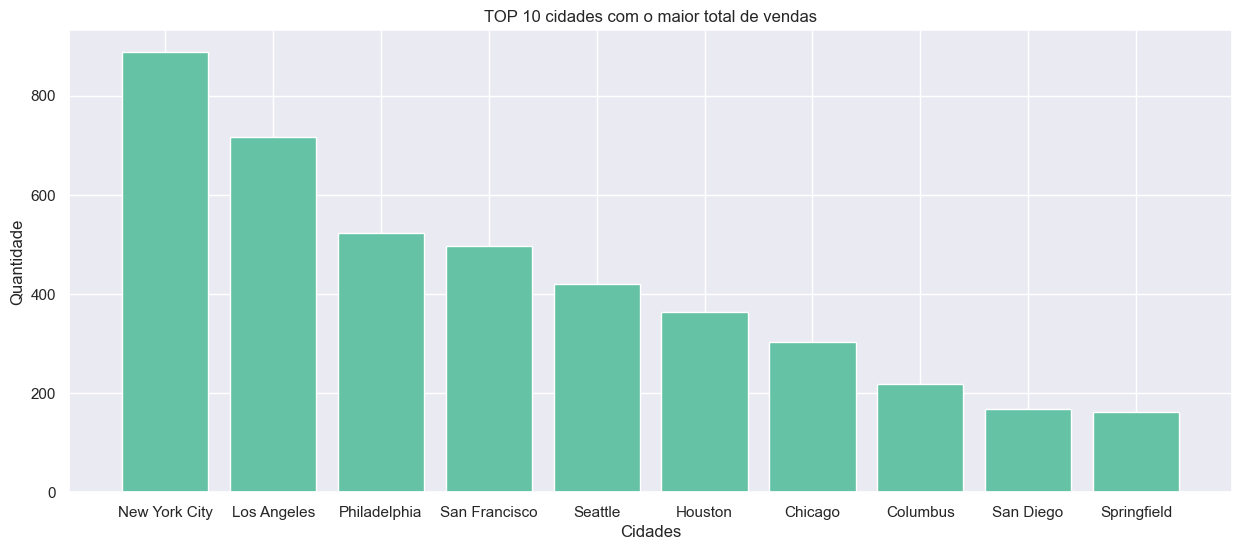

In [247]:
plt.figure(figsize=(15, 6))
plt.bar(lista_cidades[:10], lista_quantidade[:10])
plt.title('TOP 10 cidades com o maior total de vendas')
plt.xlabel('Cidades')
plt.ylabel('Quantidade')
plt.show()

In [248]:
df_cidade = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending=False).head(10)

In [249]:
df_cidade

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


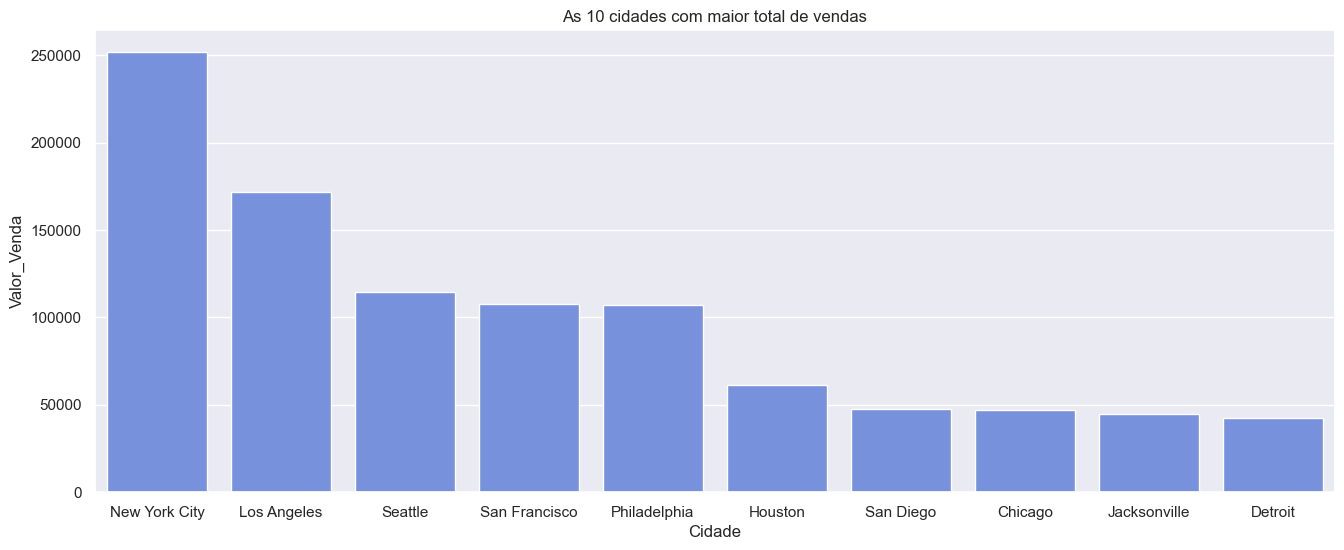

In [250]:
plt.figure(figsize=(16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_cidade, x= 'Cidade', y='Valor_Venda')
plt.title('As 10 cidades com maior total de vendas')
plt.show()

QUAL SEGMENTO TEVE O MAIOR TOTAL DE VENDAS?
DEMONSTRE O RESULTADO ATRAVÉS DE UM GRÁFICO DE PIZZA.

In [251]:
segmento = df['Segmento'].value_counts()
lista_segmento = list(segmento.index)
lista_quantidade = list(segmento.values)
print(lista_segmento, lista_quantidade)

['Consumer', 'Corporate', 'Home Office'] [np.int64(5039), np.int64(2930), np.int64(1731)]


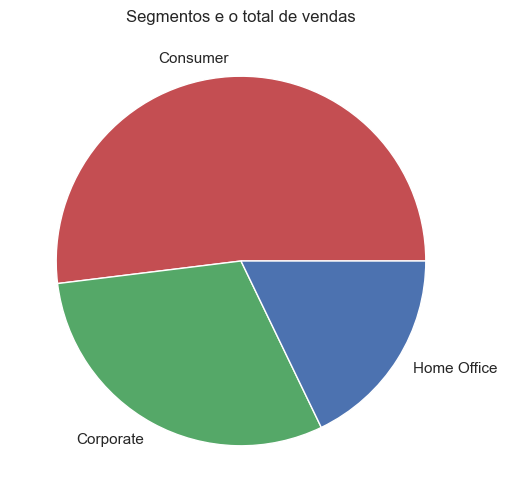

In [252]:
plt.figure(figsize=(10, 6))
plt.pie(lista_quantidade, labels=lista_segmento,colors=['r', 'g', 'b'], shadow=False)
plt.title('Segmentos e o total de vendas')
plt.show()

QUAL O TOTAL DE VENDAS POR SEGMENTO E POR ANO?

In [253]:
soma15, soma16, soma17, soma18 = 0, 0, 0, 0
for data in df['Data_Pedido']:
    if data.endswith('15'):
        soma15 += 1
    elif data.endswith('16'):
        soma16 += 1
    elif data.endswith('17'):
        soma17 += 1  
    else:
        soma18 += 1

print(soma15, soma16, soma17, soma18)

1921 2044 2509 3226


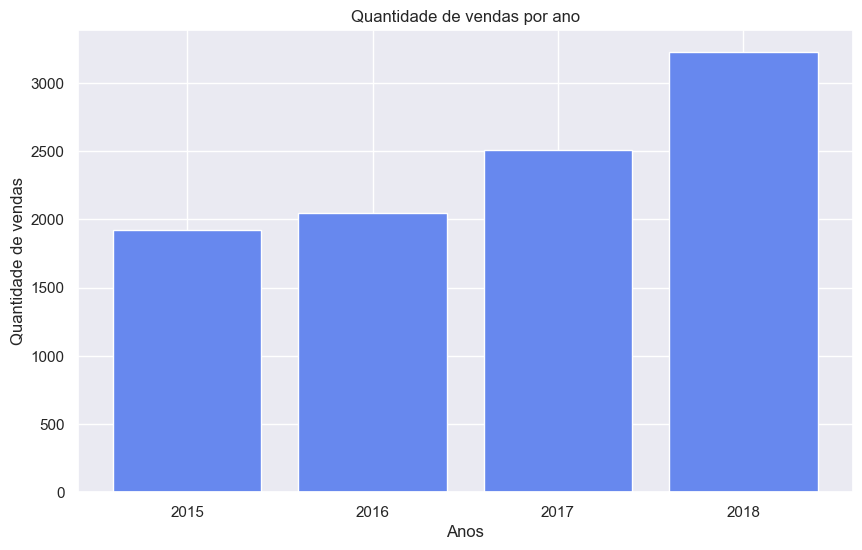

In [254]:
plt.figure(figsize=(10, 6))
plt.bar(['2015', '2016', '2017', '2018'], [soma15, soma16, soma17, soma18])
plt.title('Quantidade de vendas por ano')
plt.xlabel('Anos')
plt.ylabel('Quantidade de vendas')
plt.show()

In [255]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)

In [256]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [257]:
df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


In [258]:
df['Ano'] = df['Data_Pedido'].dt.year

In [259]:
df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017


In [260]:
df_ano = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [261]:
df_ano

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

OS GESTORES DA EMPRESA ESTÃO CONSIDERANDO CONCEDER DIFERENTES FAIXAS DE DESCONTOS E GOSTARIAM DE FAZER UMA SIMULAÇÃO COM BASE NA REGRA ABAIXO:

SE O VALOR_VENDA FOR MAIOR QUE 1000, RECEBERÁ 15% DE DESCONTO.
SE O VALOR_VENDA FOR MENOR OU IGUAL A 1000, RECEBERÁ 10% DE DESCONTO.

QUANTAS VENDAS RECEBERIAM 15% DE DESCONTO?

In [262]:
quantidade_15_desconto = [valor for valor in df['Valor_Venda']
                        if valor > 1000]
len(quantidade_15_desconto)

457

CONSIDERE QUE A EMPRESA DECIDA CONCEDER O DESCONTO DE 15% DO ITEM ANTERIOR.
QUAL SERIA A MÉDIA DO VALOR DE VENDA ANTES E DEPOIS DO DESCONTO?

In [263]:
print(f'{df['Valor_Venda'].mean():.2f}')

230.47


In [264]:
df_desconto = df.copy()


In [265]:
df_desconto.loc[df_desconto['Valor_Venda'] > 1000, 'Valor_Venda'] *= 0.85
df_desconto['Valor_Venda'].mean()
print(f'{df_desconto['Valor_Venda'].mean():.2f}')


215.51


QUAL É A MÉDIA DE VENDAS POR SEGMENTO, POR ANO E POR MÊS?
DEMONSTRE O RESULTADO ATRAVÉS DE UM GRÁFICO DE LINHA.

In [266]:
df['Mes'] = df['Data_Pedido'].dt.month

In [267]:
df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,6


In [268]:
df_ano_mes_seg = df.groupby(['Ano', 'Mes','Segmento'])['Valor_Venda'].agg([np.sum, np.mean])
df_ano_mes_seg

C:\Users\talle\AppData\Local\Temp\ipykernel_13668\3271329017.py:1: FutureWarning: The provided callable <function sum at 0x000001DA6D2F3920> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_ano_mes_seg = df.groupby(['Ano', 'Mes','Segmento'])['Valor_Venda'].agg([np.sum, np.mean])
C:\Users\talle\AppData\Local\Temp\ipykernel_13668\3271329017.py:1: FutureWarning: The provided callable <function mean at 0x000001DA6D318D60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_ano_mes_seg = df.groupby(['Ano', 'Mes','Segmento'])['Valor_Venda'].agg([np.sum, np.mean])


sum        mean
Ano  Mes Segmento                           
2015 1   Consumer      6896.6290  146.736787
         Corporate     1701.5280  130.886769
         Home Office   5607.5500  329.855882
     2   Consumer      3167.8540  117.327926
         Corporate      623.1180   69.235333
...                          ...         ...
2018 11  Corporate    44357.9862  341.215278
         Home Office  24009.3840  247.519423
     12  Consumer     48107.4558  183.616244
         Corporate    20524.4320  153.167403
         Home Office  13022.3910  224.523983

[144 rows x 2 columns]

In [269]:
anos = df_ano_mes_seg.index.get_level_values(0)
mes = df_ano_mes_seg.index.get_level_values(1)
segmento = df_ano_mes_seg.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

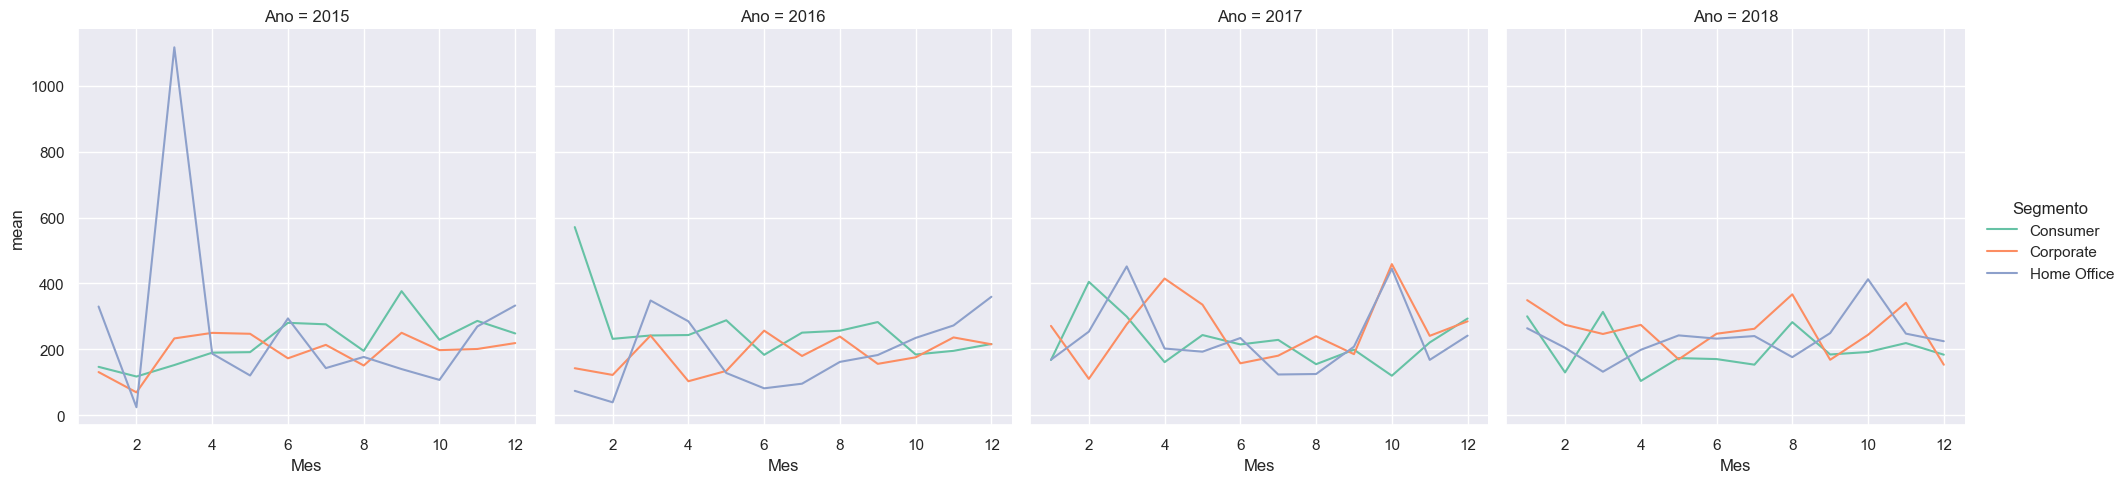

In [270]:
plt.figure(figsize=(12, 6))
sns.set_palette('Set2')
fig1 = sns.relplot(kind='line',
            data = df_ano_mes_seg,
            y='mean',
            x=mes,
            hue=segmento,
            col = anos,
            col_wrap=4)
plt.show()

QUAL É O TOTAL DE VENDAS POR CATEGORIA E SUBCATEGORIA, CONSIDERANDO SOMENTE AS 12 PRINCIPAIS SUBCATEGORIAS?
DEMONSTRE TUDO ATRAVÉS DE UM ÚNICO GRÁFICO.

In [295]:
subcategorias = df['SubCategoria'].value_counts().head(12)
subcategorias

SubCategoria
Binders        1470
Paper          1329
Furnishings     925
Phones          867
Storage         825
Art             778
Accessories     746
Chairs          596
Appliances      454
Labels          354
Tables          311
Envelopes       245
Name: count, dtype: int64

In [296]:
df_sub = df[df['SubCategoria'].isin(subcategorias.index)]
df_sub

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,CA-2017-122511,2017-03-11,BT-11485,Home Office,United States,Philadelphia,Pennsylvania,FUR-FU-10001037,Furniture,Furnishings,30.3360,2017,3
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,12
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,12
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,12


In [297]:
df_sub.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,6


In [304]:
df_cat_sub = df_sub.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()
df_cat_sub

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919.625
1,Furniture,Furnishings,88862.770
2,Furniture,Tables,202083.360
3,Office Supplies,Appliances,104061.693
4,Office Supplies,Art,26573.736
5,Office Supplies,Binders,194723.381
6,Office Supplies,Envelopes,15791.182
7,Office Supplies,Labels,12267.366
8,Office Supplies,Paper,76312.764
9,Office Supplies,Storage,216188.362


<Figure size 1600x600 with 0 Axes>

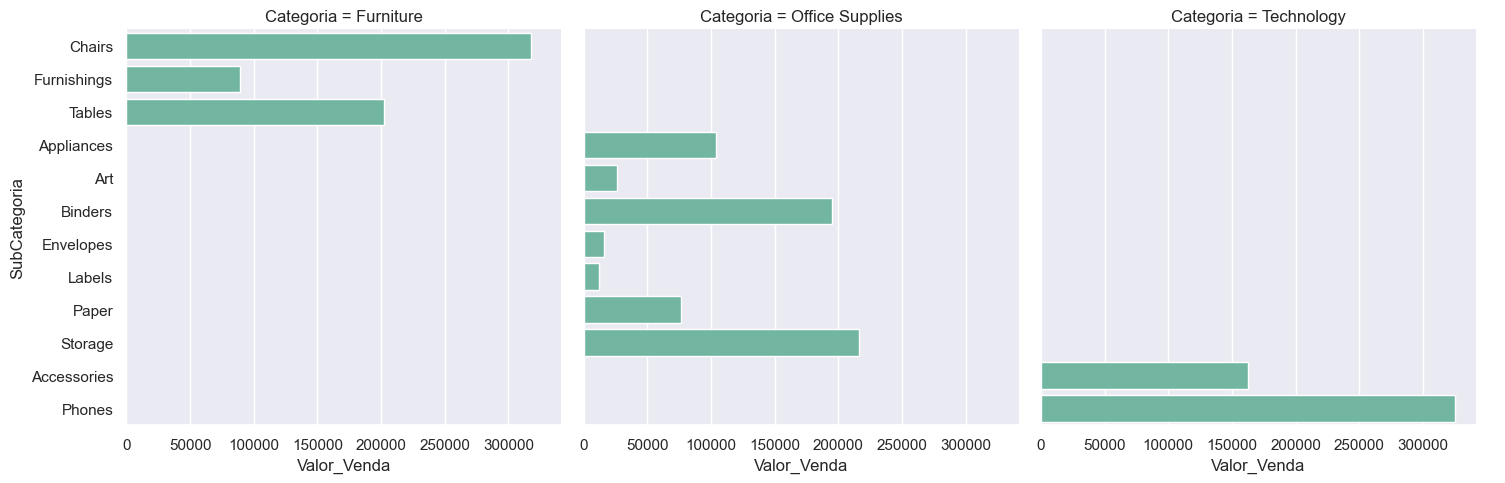

In [314]:
plt.figure(figsize=(16, 6))
sns.catplot(data=df_cat_sub,
            kind='bar',
            y = 'SubCategoria',
            x = 'Valor_Venda',
            col='Categoria',
            col_wrap=3)
plt.show()